# 1. 데이터 로드 및 구조 확인

In [4]:
import seaborn as sns
iris=sns.load_dataset('iris')

In [ ]:
# 구조 확인
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 2. 기술통계량

In [ ]:
# Species별 Petal Length의 평균, 개수, 표준편차, 최소/최대, 사분위수, 그룹별 데이터 개수 
desc_by_species = iris.groupby("species")["petal_length"].describe()
desc_by_species

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,1.462,0.173664,1.0,1.4,1.50,1.575,1.9
versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


# 3. 시각화

In [11]:
import matplotlib.pyplot as plt

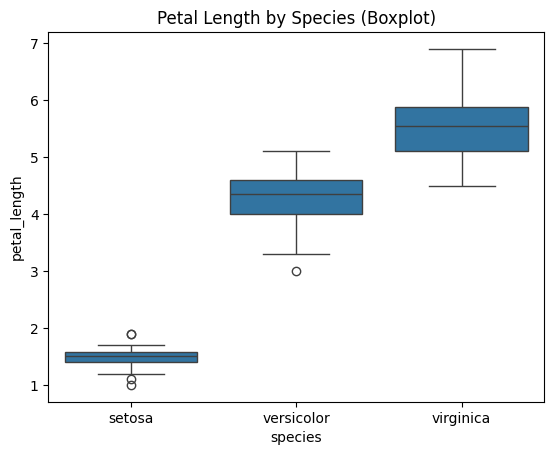

In [12]:
plt.figure()
sns.boxplot(data=iris, x="species", y="petal_length")
plt.title("Petal Length by Species (Boxplot)")
plt.show()

# 4. 정규성 검정 (Shapiro-Wilk)

In [15]:
from scipy.stats import shapiro

alpha = 0.05
results = []

for species, group in iris.groupby("species"):
    stat, p = shapiro(group["petal_length"])
    results.append([species, stat, p])

results_df = pd.DataFrame(results, columns=["species", "W-statistic", "p-value"])
results_df

,species,W-statistic,p-value
0,setosa,0.954977,0.054811
1,versicolor,0.966004,0.158478
2,virginica,0.962186,0.109775


# 5. 등분산성 검정 (Levene)

In [16]:
from scipy.stats import levene

# species별 petal_length 데이터 추출
setosa = iris.loc[iris["species"] == "setosa", "petal_length"]
versicolor = iris.loc[iris["species"] == "versicolor", "petal_length"]
virginica = iris.loc[iris["species"] == "virginica", "petal_length"]

# Levene 등분산성 검정
stat, p = levene(setosa, versicolor, virginica)

stat, p

(np.float64(19.480338801923573), np.float64(3.1287566394085397e-08))

# 6. ANOVA 가설 수립

# 7. One-way ANOVA

In [17]:
from scipy.stats import f_oneway

# species별 petal_length 데이터
setosa = iris.loc[iris["species"] == "setosa", "petal_length"]
versicolor = iris.loc[iris["species"] == "versicolor", "petal_length"]
virginica = iris.loc[iris["species"] == "virginica", "petal_length"]

# One-way ANOVA
F_stat, p_value = f_oneway(setosa, versicolor, virginica)

F_stat, p_value

(np.float64(1180.1611822529785), np.float64(2.8567766109619814e-91))

# 8. 사후검정 (Tukey HSD)

In [ ]:
ANOVA 결과 유의하다면 Tukey HSD 사후검정을 실시하시오
어떤 종 사이에 유의미한 차이가 있는지 정리

In [21]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey HSD 사후검정
tukey = pairwise_tukeyhsd(
    endog=iris["petal_length"],   # 비교할 값
    groups=iris["species"],       # 그룹
    alpha=0.05
)

print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------


# 9. 결과 요약

# 10. 회귀 분석

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# 1) 입력(X), 타겟(y) 설정
X = iris[["sepal_length", "sepal_width", "petal_width"]]
y = iris["petal_length"]

# 2) Train/Test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3) Linear Regression 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 4) 예측
y_pred = model.predict(X_test)

# 5) 성능 지표(MSE, R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R^2:", r2)

# 6) 회귀계수 출력
coef_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": model.coef_
})
print("\nIntercept:", model.intercept_)
coef_df

MSE: 0.13001626031382701
R^2: 0.9603293155857663

Intercept: -0.2621959025887084


,feature,coefficient
0,sepal_length,0.722815
1,sepal_width,-0.635816
2,petal_width,1.467524
